first error percent is:  5.42011746512


/home/picher/myconfig/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:86: RuntimeWarning: overflow encountered in exp


loss is:  0.604158823002
right percent is:  0.77482088024565
first error percent is:  5.42011746512
loss is:  0.767387767234
right percent is:  0.77482088024565


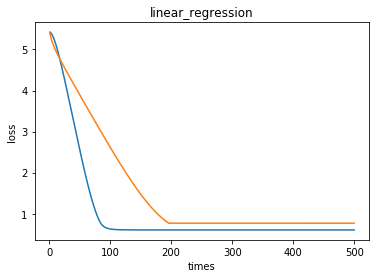

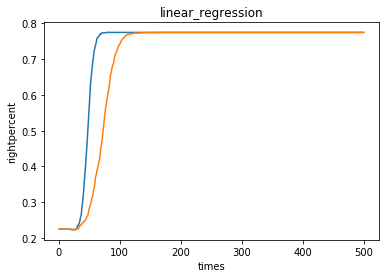

In [2]:
from sklearn.externals.joblib import Memory
from sklearn.datasets import load_svmlight_file
from sklearn.model_selection import train_test_split
from numpy import *
import numpy as np
import pylab as pl

mem = Memory("./mycache")
# 导入数据
@mem.cache
def get_data():
    data = load_svmlight_file("/home/picher/workSpace/ML_exp2/a9a.txt",123,dtype=float64)
    return data[0], data[1]

def ini_para(feature_num):
    prng = random.seed(1)
    # 全 0
    #w = zeros((1,feature_num), dtype = float)
    # 随机
    w1 = np.random.random([1,feature_num])
    # 卡方分布
    #w2 = np.random.chisquare(1,size=(1,feature_num))
    # 正态分布
    #w3 = np.random.randn(1,feature_num)
    # 打印参数，测试用
    #print (w)
    #print(w1.dtype)
    return w1

def likelihood(y,model):
    result = y*model.transpose(1,0)
    return result

def logistic_regression(x,y,w,compute_times,type):
    eta = 0.00233
    gama = 0.9
    times = 0
    v = 0
    G = 0
    error = 1
    right = 0
    shape = y.shape[0]
    predit = np.ones((shape,1))
    if type ==1:
        while times < 500:
            model = model_compute(w, x)
            for i in range(0, shape):
                predit[i] = predit[i]/(1 + np.exp(-model[0][i]))
            right = right_percent(y, predit)
            RIGHT_NAG.append(right)
            like = likelihood(y, model)
            error = cross_entropy_error(like, shape)
            error_NAG.append(error)
            #print('error is ', error)
            w, v = NAG(w, v, x, y,like, gama, eta,shape)
            times = times + 1
            compute_times.append(times)
            if times == 1:
                print('first error percent is: ', error)
        print('loss is: ', error)
        print('right percent is: ', right)
        return w
    elif type ==2:
        while times < 500:
            model = model_compute(w, x)
            for i in range(0, shape):
                predit[i] = predit[i] / (1 + np.exp(-model[0][i]))
            right = right_percent(y, predit)
            RIGHT_RMSProp.append(right)
            like = likelihood(y, model)
            error = cross_entropy_error(like, shape)
            error_RMSProp.append(error)
            # print('error is ', error)
            w, G = RMSProp(w, G, x, y, like, gama, eta,shape)
            times = times + 1
            compute_times.append(times)
            if times == 1:
                print('first error percent is: ', error)
        print('loss is: ', error)
        print('right percent is: ', right)
        return w


def NAG(w_old, v, x, y,like, gama, eta,shape):
    likelihood = np.sum(like)
    denominator = 1 + np.exp(likelihood)
    y1 = y.transpose(1,0)
    numerator = np.dot(y1,x)
    g_t = (numerator/denominator)/shape
    v_t = gama*v + eta*g_t
    res = w_old + v_t
    return res, v_t

def RMSProp(w_old, G, x, y,like, gama, eta,shape):
    likelihood = np.sum(like)
    denominator = 1 + np.exp(likelihood)
    small = 1e-8
    y1 = y.transpose(1, 0)
    numerator = np.dot(y1, x)
    g_t = (numerator / denominator) /shape
    G_t = gama*G + (1-gama)*(g_t*g_t)
    result = w_old + (eta/(pow(G_t+small,0.5)))*g_t
    return result, G_t


def model_compute(w,x):
    result = np.dot(w,x.transpose(1,0))
    return result

def  cross_entropy_error(like,shape):
    result = np.sum(np.log(1 + exp(-like)))/shape
    return result

def right_percent(y,y1):
    right = 0
    shape = y.shape[0]
    compute = zeros((shape, 1))
    for i in range(0, shape):
        if y1[i]>=0.7:
            compute[i]=1
        else:
            compute[i]=-1
    for k in range(0, shape):
        if compute[k]==y[k]:
            right = right+1
    result = right/shape
    return result

# 处理数据格式等
w = ini_para(124)
x, y = get_data()
x = x.toarray()
b = np.ones((32561,1))
x = np.c_[x,b]
size = x.shape[0]
y = np.reshape(y,(32561,1))
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.06)
# 数组用于存放训练集和测试集的训练结果，用于画图
# 次数
compute_times_NAG = []
compute_times_RMSProp = []
RIGHT_NAG = []
RIGHT_RMSProp = []
# 错误率
error_RMSProp = []
error_NAG = []
# loss
loss_pic_train = []
loss_pic_test = []
# 分类器训练
logistic_regression(x_test,y_test,w,compute_times_NAG,1)
logistic_regression(x_test,y_test,w,compute_times_RMSProp,2)
# 以下为作图部分
# 图一展示 loss 随训练次数的变化
pl.figure(1)
pl.plot(compute_times_NAG, error_NAG)# use pylab to plot x and y
pl.plot(compute_times_RMSProp, error_RMSProp)# use pylab to plot x and y
pl.title('linear_regression')# give plot a title
pl.xlabel('times')# make axis labels
pl.ylabel('loss')
# 图二展示 right 随训练次数的变化
pl.figure(2)
pl.plot(compute_times_NAG, RIGHT_NAG)# use pylab to plot x and y
pl.plot(compute_times_RMSProp, RIGHT_RMSProp)# use pylab to plot x and y
pl.title('linear_regression')# give plot a title
pl.xlabel('times')# make axis labels
pl.ylabel('rightpercent')


pl.show()# show the plot on the screen


